# Code tutorial

## Updates
- KDE PSTHs for eye movements and flashed stim
- more usable format for ephys data (dict, not pd.DataFrame). Tried to have standard way to store everything, but that didn't work well because there were different data types and shapes stored in cell of dataframe. this will be better way(?)
- going to eliminate xarrays, since dims get mixed up and messy

In [184]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(0, '/home/niell_lab/Documents/GitHub/FreelyMovingEphys/')

from fmEphys.utils.save import read_h5, write_h5
from fmEphys.utils.path import find

In [186]:
# Open the ephys data, which is saved as an .h5 file

path = '/home/niell_lab/Data/freely_moving_ephys/ephys_recordings/070921/J553RT'

In [51]:
## nc files
# one file formatted the old way
sparsenoise_file = os.path.join(path, 'hf2_sparsenoiseflash/070921_J553RT_control_Rig2_hf2_sparsenoiseflash_ephys_props.h5')

In [188]:
find('*.nc',path)

['/home/niell_lab/Data/freely_moving_ephys/ephys_recordings/070921/J553RT/hf2_sparsenoiseflash/070921_J553RT_control_Rig2_hf2_sparsenoiseflash_REYE.nc',
 '/home/niell_lab/Data/freely_moving_ephys/ephys_recordings/070921/J553RT/hf2_sparsenoiseflash/070921_J553RT_control_Rig2_hf2_sparsenoiseflash_speed.nc',
 '/home/niell_lab/Data/freely_moving_ephys/ephys_recordings/070921/J553RT/hf2_sparsenoiseflash/070921_J553RT_control_Rig2_hf2_sparsenoiseflash_world.nc',
 '/home/niell_lab/Data/freely_moving_ephys/ephys_recordings/070921/J553RT/hf1_wn/070921_J553RT_control_Rig2_hf1_wn_REYE.nc',
 '/home/niell_lab/Data/freely_moving_ephys/ephys_recordings/070921/J553RT/hf1_wn/070921_J553RT_control_Rig2_hf1_wn_world.nc',
 '/home/niell_lab/Data/freely_moving_ephys/ephys_recordings/070921/J553RT/hf1_wn/070921_J553RT_control_Rig2_hf1_wn_speed.nc',
 '/home/niell_lab/Data/freely_moving_ephys/ephys_recordings/070921/J553RT/hf4_revchecker/070921_J553RT_control_Rig2_hf4_revchecker_REYE.nc',
 '/home/niell_lab/Dat

In [191]:
gt_nc = os.path.join(path, '/home/niell_lab/Data/freely_moving_ephys/ephys_recordings/070921/J553RT/hf3_gratings/070921_J553RT_control_Rig2_hf3_gratings_REYE.nc')
eyecam = xr.open_dataset(gt_nc)

In [192]:
eyecam

<xarray.Dataset>
Dimensions:              (ellipse_params: 7, frame: 50986, height: 120, point_loc: 45, width: 160)
Coordinates:
  * frame                (frame) int64 0 1 2 3 4 ... 50982 50983 50984 50985
  * point_loc            (point_loc) object 'pt1_x' ... 'spot_cent_likelihood'
    timestamps           (frame) float64 ...
  * ellipse_params       (ellipse_params) object 'theta' 'phi' ... 'ellipse_phi'
Dimensions without coordinates: height, width
Data variables:
    REYE_pts             (frame, point_loc) float64 ...
    REYE_ellipse_params  (frame, ellipse_params) float64 ...
    REYE_video           (frame, height, width) int8 ...

In [199]:
eyecam.ellipse_params.sel(ellipse_params='theta')

<xarray.DataArray 'ellipse_params' ()>
array('theta', dtype='<U5')
Coordinates:
    ellipse_params  <U5 'theta'

## old format

In [18]:
# one file formatted the old way
sparsenoise_file = os.path.join(path, 'hf2_sparsenoiseflash/070921_J553RT_control_Rig2_hf2_sparsenoiseflash_ephys_props.h5')

In [20]:
Sn_data = pd.read_hdf(sparsenoise_file)

In [52]:
Sn_data

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,...,Sn_dEye_dpf,Sn_dEye_dps,Sn_theta,Sn_phi,Sn_ballspeed,Sn_ballspeed_tuning_bins,Sn_ballspeed_tuning,Sn_ballspeed_tuning_err,session,example_data
7,1810.9,3.8,good,93.714020,1,750,2.217768,good,11086,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.3308599503724385, 0.2409387257650889, 1.186...","[0.021366158699468334, 0.032346296350173095, 0...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
30,1193.5,0.0,good,93.972595,6,625,1.038866,good,5193,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[1.060870669985567, 1.1817263157837232, 0.7362...","[0.03781331097588692, 0.07425739429707988, 0.1...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
31,1034.5,1.0,good,79.441597,6,625,4.455941,good,22274,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[3.412912555825767, 2.043613961247809, 1.78246...","[0.07300759187339262, 0.09772245650857433, 0.1...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
32,1753.2,4.7,good,106.100723,6,625,25.369094,good,126813,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[33.56160972711274, 30.43850991690419, 32.5647...","[0.24015148484395385, 0.4429599168523517, 0.91...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34,1075.0,4.6,good,100.154495,6,625,16.141732,good,80688,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[17.446508585642693, 18.405013628779283, 13.66...","[0.16648633937465196, 0.3261332064026832, 0.58...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1417.3,0.0,good,143.114685,115,300,1.286129,good,6429,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.27878292804094784, 0.2652241551302208, 0.01...","[0.019387225015509095, 0.033514798060962324, 0...",070921_J553RT_control_Rig2,NaN
537,1882.3,4.3,good,94.792122,115,300,2.084334,good,10419,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.7300031761755041, 0.4062032132807568, 0.149...","[0.0341

In [72]:
type(Sn_data)

pandas.core.frame.DataFrame

In [68]:
row = Sn_data.loc[7]

In [71]:
type(row)

pandas.core.series.Series

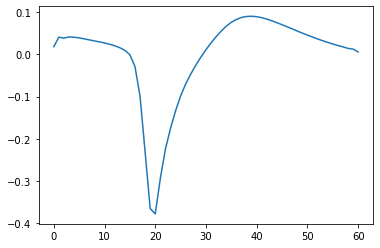

In [67]:
plt.plot(Sn_data.loc[7,'waveform'])

In [21]:
Sn_data.columns

Index(['Amplitude', 'ContamPct', 'KSLabel', 'amp', 'ch', 'depth', 'fr',
       'group', 'n_spikes', 'sh', 'waveform', 'spikeT', 't0', 'spikeTraw',
       'rate', 'Sn_contrast', 'Sn_contrast_tuning_bins', 'Sn_contrast_tuning',
       'Sn_contrast_tuning_err', 'Sn_spike_triggered_average',
       'Sn_spike_triggered_variance', 'Sn_rightsacc_avg', 'Sn_leftsacc_avg',
       'Sn_pupilradius_tuning_bins', 'Sn_pupilradius_tuning',
       'Sn_pupilradius_tuning_err', 'Sn_theta_tuning_bins', 'Sn_theta_tuning',
       'Sn_theta_tuning_err', 'Sn_phi_tuning_bins', 'Sn_phi_tuning',
       'Sn_phi_tuning_err', 'Sn_eyeT', 'Sn_dEye_dpf', 'Sn_dEye_dps',
       'Sn_theta', 'Sn_phi', 'Sn_ballspeed', 'Sn_ballspeed_tuning_bins',
       'Sn_ballspeed_tuning', 'Sn_ballspeed_tuning_err', 'session'],
      dtype='object')

In [22]:
len(Sn_data.index.values)

128

In [54]:
Sn_data['ch']

7        1
30       6
31       6
32       6
34       6
      ... 
534    115
537    115
541    117
545    117
549    118
Name: ch, Length: 128, dtype: int64

In [57]:
# iterate
for ind, row in Sn_data.iterrows():
    print(row['ch'])

1
6
6
6
6
7
7
8
8
8
10
12
12
12
13
14
15
15
17
17
18
19
19
20
20
21
22
23
23
24
26
26
26
27
32
33
34
38
38
39
40
40
41
43
43
43
44
44
44
45
46
48
51
54
54
55
55
55
56
56
56
57
57
58
65
66
67
67
68
68
68
70
70
70
70
70
71
71
71
72
73
73
74
75
76
76
77
80
80
82
83
83
84
84
84
85
88
88
88
95
96
96
96
97
97
97
97
98
98
99
99
100
101
104
108
109
110
110
112
114
114
114
115
115
115
117
117
118


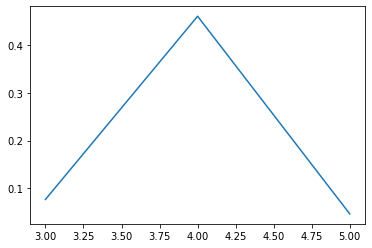

In [59]:
plt.plot(Sn_data.loc[7,'Sn_phi_tuning'])

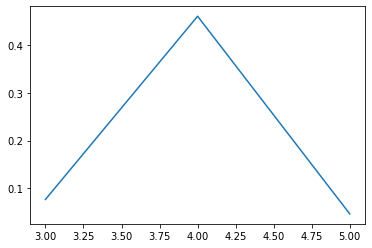

In [61]:
plt.plot(Sn_data.iloc[0]['Sn_phi_tuning'])

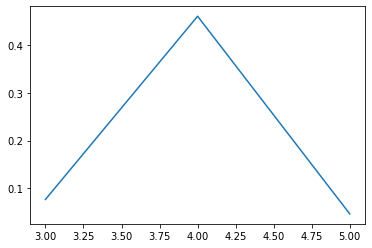

In [63]:
plt.plot(Sn_data.at[7,'Sn_phi_tuning'])

In [26]:
Sn_data.index.values

array([  7,  30,  31,  32,  34,  36,  38,  42,  44,  45,  55,  57,  58,
        60,  63,  64,  70,  71,  80,  83,  85,  89,  91,  95,  96, 104,
       106, 107, 110, 122, 126, 127, 128, 130, 137, 147, 156, 168, 170,
       172, 174, 176, 178, 184, 185, 189, 191, 192, 198, 207, 211, 219,
       232, 241, 243, 244, 247, 249, 256, 258, 260, 263, 269, 270, 284,
       287, 297, 298, 301, 304, 305, 308, 310, 311, 312, 313, 315, 316,
       317, 321, 326, 327, 330, 336, 337, 338, 343, 366, 368, 376, 377,
       380, 381, 382, 384, 388, 404, 406, 408, 419, 423, 424, 425, 429,
       430, 435, 436, 438, 441, 442, 448, 449, 456, 481, 503, 511, 515,
       516, 520, 529, 530, 531, 533, 534, 537, 541, 545, 549])

In [35]:
# it works worse for data types that are lists or arrays...
Sn_data['spikeT']

7      [7.4335920648999965, 7.478597194899996, 8.5879...
30     [0.7744996816, 0.9385183776, 0.9785229376, 0.9...
31     [0.7458297468999961, 1.5625895135999999, 1.666...
32     [0.0227139878, 0.0261477124999962, 0.257607429...
34     [0.4214261025000038, 0.4814996166999962, 0.490...
                             ...                        
534    [1.4418424167000037, 1.7741136246, 1.873624967...
537    [1.8774254008, 5.6970607896, 25.47728214450000...
541    [-0.0365260980999962, 0.008579043300003808, 0....
545    [0.2546404244, 1.1250063015000038, 1.297292606...
549    [3.8881545978000003, 13.496383144299996, 14.62...
Name: spikeT, Length: 128, dtype: object

In [74]:
Sn_data.loc[7, 'spikeT']

array([  7.43359206,   7.47859719,   8.58799032,  11.30746697,
        12.8921476 ,  14.161859  ,  23.12754764,  23.71608139,
        24.79487103,  26.26330507,  30.99121066,  31.68192273,
        34.55438348,  38.22920236,  39.0705316 ,  48.01255087,
        49.70507713,  51.08573451,  51.63439705,  52.1176188 ,
        52.18696003,  52.84946888,  52.91781001,  53.45550463,
        54.01590184,  54.03790435,  55.43256332,  56.11440771,
        62.0272817 ,  81.90198049,  82.04429672,  84.61635656,
        90.10338201,  90.62017425,  90.6337758 ,  96.57588646,
        97.67304486,  98.71289672, 102.10311649, 106.87419367,
       119.90171197, 123.56196252, 130.00249666, 130.18525083,
       133.46795834, 134.82971357, 138.90027756, 140.79362671,
       149.53772342, 151.04339505, 159.28820152, 159.29956948,
       163.69163678, 168.87236065, 169.68948713, 173.8400269 ,
       176.08228249, 177.6039226 , 181.9596191 , 183.19632673,
       186.63081822, 187.57675938, 189.85841946, 199.01

In [73]:
# number of spikes
len(Sn_data.loc[7, 'spikeT'])

88

In [75]:
# cell w/ highest firing rate
max_fr = []
for ind, row in Sn_data.iterrows():
    print(ind, len(row['spikeT']))

7 88
30 252
31 1005
32 7990
34 4529
36 766
38 193
42 863
44 2380
45 2943
55 4538
57 9322
58 761
60 105
63 5162
64 6489
70 2845
71 349
80 2975
83 41
85 864
89 494
91 572
95 712
96 997
104 924
106 10261
107 281
110 1252
122 680
126 1399
127 2238
128 979
130 1613
137 193
147 785
156 705
168 1754
170 986
172 1875
174 314
176 810
178 5110
184 396
185 1170
189 12718
191 683
192 312
198 7332
207 207
211 2196
219 372
232 6114
241 2596
243 370
244 128
247 1618
249 538
256 351
258 5836
260 265
263 646
269 434
270 266
284 458
287 398
297 228
298 1813
301 690
304 111
305 666
308 1092
310 1029
311 1387
312 1002
313 125
315 263
316 756
317 334
321 3658
326 2198
327 569
330 7566
336 3988
337 2281
338 896
343 4333
366 1567
368 589
376 2879
377 154
380 5886
381 563
382 857
384 2524
388 82
404 1320
406 260
408 825
419 15127
423 255
424 247
425 982
429 235
430 690
435 196
436 527
438 562
441 393
442 228
448 689
449 5792
456 223
481 1369
503 2121
511 931
515 1790
516 2595
520 1448
529 6611
530 327
531 235

In [77]:
# for simple operations, you can get around this
Sn_data['spikeT'].map(len)

7        88
30      252
31     1005
32     7990
34     4529
       ... 
534      74
537     199
541    9533
545     519
549      89
Name: spikeT, Length: 128, dtype: int64

In [79]:
# for simple operations, you can get around this
spikeT_diff = Sn_data['spikeT'].map(np.diff)

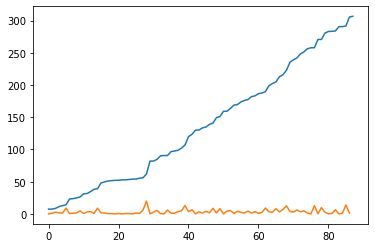

In [84]:
plt.plot(Sn_data.loc[7,'spikeT'])
plt.plot(spikeT_diff.loc[7])

In [85]:
np.diff(Sn_data.loc[7,'spikeT'])

array([4.50051300e-02, 1.10939312e+00, 2.71947665e+00, 1.58468063e+00,
       1.26971140e+00, 8.96568864e+00, 5.88533752e-01, 1.07878963e+00,
       1.46843405e+00, 4.72790559e+00, 6.90712065e-01, 2.87246076e+00,
       3.67481888e+00, 8.41329234e-01, 8.94201927e+00, 1.69252626e+00,
       1.38065738e+00, 5.48662540e-01, 4.83221748e-01, 6.93412373e-02,
       6.62508851e-01, 6.83411234e-02, 5.37694623e-01, 5.60397211e-01,
       2.20025080e-02, 1.39465897e+00, 6.81844388e-01, 5.91287399e+00,
       1.98746988e+01, 1.42316222e-01, 2.57205985e+00, 5.48702545e+00,
       5.16792241e-01, 1.36015504e-02, 5.94211066e+00, 1.09715840e+00,
       1.03985186e+00, 3.39021977e+00, 4.77107717e+00, 1.30275183e+01,
       3.66025055e+00, 6.44053414e+00, 1.82754165e-01, 3.28270752e+00,
       1.36175522e+00, 4.07056399e+00, 1.89334915e+00, 8.74409671e+00,
       1.50567163e+00, 8.24480647e+00, 1.13679625e-02, 4.39206731e+00,
       5.18072387e+00, 8.17126475e-01, 4.15053977e+00, 2.24225559e+00,
      

In [86]:
Sn_data['example_thing'] = np.ones(128)

In [89]:
Sn_data['example_thing_2D'] = np.ones([128,2])

ValueError: Expected a 1D array, got an array with shape (128, 2)

In [88]:
Sn_data

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,...,Sn_dEye_dps,Sn_theta,Sn_phi,Sn_ballspeed,Sn_ballspeed_tuning_bins,Sn_ballspeed_tuning,Sn_ballspeed_tuning_err,session,example_data,example_thing
7,1810.9,3.8,good,93.714020,1,750,2.217768,good,11086,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.3308599503724385, 0.2409387257650889, 1.186...","[0.021366158699468334, 0.032346296350173095, 0...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
30,1193.5,0.0,good,93.972595,6,625,1.038866,good,5193,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[1.060870669985567, 1.1817263157837232, 0.7362...","[0.03781331097588692, 0.07425739429707988, 0.1...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
31,1034.5,1.0,good,79.441597,6,625,4.455941,good,22274,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[3.412912555825767, 2.043613961247809, 1.78246...","[0.07300759187339262, 0.09772245650857433, 0.1...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
32,1753.2,4.7,good,106.100723,6,625,25.369094,good,126813,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[33.56160972711274, 30.43850991690419, 32.5647...","[0.24015148484395385, 0.4429599168523517, 0.91...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
34,1075.0,4.6,good,100.154495,6,625,16.141732,good,80688,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[17.446508585642693, 18.405013628779283, 13.66...","[0.16648633937465196, 0.3261332064026832, 0.58...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1417.3,0.0,good,143.114685,115,300,1.286129,good,6429,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.27878292804094784, 0.2652241551302208, 0.01...","[0.019387225015509095, 0.033514798060962324, 0...",070921_J553RT_control_Rig2,NaN,1.0
537,1882.3,4.3,good,94.792122,115,300,2.084334,good,10419,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.7300031761755041, 0.4062032132807568, 0.149...","[0.03412795327941713, 0.041609975436005565, 0....",070921_J553RT_control_Rig2,NaN,1.0
541,1615.4,0.0,good,121.466125,117,250,15.282112,good,76391,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarra

In [ ]:
# some things need to be iterated
# e.g., evoked firing rate at a specific timepoint

In [95]:
# adding new columns as an object

# 128 cells x 50 timepoints

nan_array = np.zeros(128)*np.nan

empty_series = pd.Series(nan_array)

In [96]:
empty_series

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
123   NaN
124   NaN
125   NaN
126   NaN
127   NaN
Length: 128, dtype: float64

In [97]:
np.zeros(50)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

ERROR! Session/line number was not unique in database. History logging moved to new session 5270


In [ ]:
for ind, val in empty_series.iteritems():
    empty_series[ind] = np.zeros(50)

In [48]:
empty_series

0      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
123    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
124    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
125    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
126    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
127    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Length: 128, dtype: object

In [49]:
Sn_data['example_data'] = empty_series

In [50]:
Sn_data

,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,...,Sn_dEye_dpf,Sn_dEye_dps,Sn_theta,Sn_phi,Sn_ballspeed,Sn_ballspeed_tuning_bins,Sn_ballspeed_tuning,Sn_ballspeed_tuning_err,session,example_data
7,1810.9,3.8,good,93.714020,1,750,2.217768,good,11086,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.3308599503724385, 0.2409387257650889, 1.186...","[0.021366158699468334, 0.032346296350173095, 0...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
30,1193.5,0.0,good,93.972595,6,625,1.038866,good,5193,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[1.060870669985567, 1.1817263157837232, 0.7362...","[0.03781331097588692, 0.07425739429707988, 0.1...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
31,1034.5,1.0,good,79.441597,6,625,4.455941,good,22274,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[3.412912555825767, 2.043613961247809, 1.78246...","[0.07300759187339262, 0.09772245650857433, 0.1...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
32,1753.2,4.7,good,106.100723,6,625,25.369094,good,126813,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[33.56160972711274, 30.43850991690419, 32.5647...","[0.24015148484395385, 0.4429599168523517, 0.91...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
34,1075.0,4.6,good,100.154495,6,625,16.141732,good,80688,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[17.446508585642693, 18.405013628779283, 13.66...","[0.16648633937465196, 0.3261332064026832, 0.58...",070921_J553RT_control_Rig2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1417.3,0.0,good,143.114685,115,300,1.286129,good,6429,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.27878292804094784, 0.2652241551302208, 0.01...","[0.019387225015509095, 0.033514798060962324, 0...",070921_J553RT_control_Rig2,NaN
537,1882.3,4.3,good,94.792122,115,300,2.084334,good,10419,0,...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[<xarray.DataArray '__xarray_dataarray_variabl...,"[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.7300031761755041, 0.4062032132807568, 0.149...","[0.0341

## new format option

In [2]:
# files saved out *not* as a dataframe format

checkerboard_file = os.path.join(path, 'hf4_revchecker/070921_J553RT_control_Rig2_hf4_revchecker_ephys_props.h5')

whitenoise_file = os.path.join(path, 'hf1_wn/070921_J553RT_control_Rig2_hf1_wn_ephys_props.h5')

In [ ]:
# can convert these, in theory
# but differnces in PSTHs make it work rerunning ephys analysis

In [3]:
Rc_data = read_h5(checkerboard_file)

In [ ]:
# properties
list(Rc_data.keys())

['Rc_Amplitude',
 'Rc_CRF',
 'Rc_CRF_bins',
 'Rc_CRF_err',
 'Rc_ContamPct',
 'Rc_KSLabel',
 'Rc_Phi_bins',
 'Rc_Phi_err',
 'Rc_Phi_tuning',
 'Rc_PupilRadius_bins',
 'Rc_PupilRadius_err',
 'Rc_PupilRadius_tuning',
 'Rc_STA',
 'Rc_STV',
 'Rc_Theta_bins',
 'Rc_Theta_err',
 'Rc_Theta_tuning',
 'Rc_amp',
 'Rc_ballspeed',
 'Rc_ballspeed_tuning',
 'Rc_ballspeed_tuning_bins',
 'Rc_ballspeed_tuning_err',
 'Rc_center_layer4',
 'Rc_ch',
 'Rc_dEye',
 'Rc_dEye_dpf',
 'Rc_depth',
 'Rc_eyeT',
 'Rc_fr',
 'Rc_group',
 'Rc_laminar_depth_LFP',
 'Rc_n_spikes',
 'Rc_phi',
 'Rc_rate',
 'Rc_rev_resp_mean',
 'Rc_saccade_leftPSTH',
 'Rc_saccade_leftT',
 'Rc_saccade_rightPSTH',
 'Rc_saccade_rightT',
 'Rc_session',
 'Rc_sh',
 'Rc_spikeT',
 'Rc_spikeTraw',
 'Rc_stim',
 'Rc_stim_CSD',
 'Rc_stim_PSTH',
 'Rc_t0',
 'Rc_theta',
 'Rc_waveform']

In [29]:
Rc_data['Rc_group']

{'0': b'good',
 '1': b'good',
 '10': b'good',
 '100': b'good',
 '101': b'good',
 '102': b'good',
 '103': b'good',
 '104': b'good',
 '105': b'good',
 '106': b'good',
 '107': b'good',
 '108': b'good',
 '109': b'good',
 '11': b'good',
 '110': b'good',
 '111': b'good',
 '112': b'good',
 '113': b'good',
 '114': b'good',
 '115': b'good',
 '116': b'good',
 '117': b'good',
 '118': b'good',
 '119': b'good',
 '12': b'good',
 '120': b'good',
 '121': b'good',
 '122': b'good',
 '123': b'good',
 '124': b'good',
 '125': b'good',
 '126': b'good',
 '127': b'good',
 '13': b'good',
 '14': b'good',
 '15': b'good',
 '16': b'good',
 '17': b'good',
 '18': b'good',
 '19': b'good',
 '2': b'good',
 '20': b'good',
 '21': b'good',
 '22': b'good',
 '23': b'good',
 '24': b'good',
 '25': b'good',
 '26': b'good',
 '27': b'good',
 '28': b'good',
 '29': b'good',
 '3': b'good',
 '30': b'good',
 '31': b'good',
 '32': b'good',
 '33': b'good',
 '34': b'good',
 '35': b'good',
 '36': b'good',
 '37': b'good',
 '38': b'good',


In [150]:
df = pd.DataFrame(np.zeros([128,50]))

In [154]:
len(df[9].to_list())

128

In [155]:
example_dict = {
    'spikeT': df[9].to_list()
}

In [ ]:
for i in [0,1]:
    

In [157]:
[example_dict['spikeT'][i] for i in range(2)]

[0.0, 0.0]

In [12]:
# List the Phy2 unit labels
unit_list = Rc_data['Rc_group'].keys()
unit_list = list(map(int, unit_list))
sorted(unit_list)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [103]:
Rc_data['Rc_t0']

{'0': 39117.798476,
 '1': 39117.798476,
 '10': 39117.798476,
 '100': 39117.798476,
 '101': 39117.798476,
 '102': 39117.798476,
 '103': 39117.798476,
 '104': 39117.798476,
 '105': 39117.798476,
 '106': 39117.798476,
 '107': 39117.798476,
 '108': 39117.798476,
 '109': 39117.798476,
 '11': 39117.798476,
 '110': 39117.798476,
 '111': 39117.798476,
 '112': 39117.798476,
 '113': 39117.798476,
 '114': 39117.798476,
 '115': 39117.798476,
 '116': 39117.798476,
 '117': 39117.798476,
 '118': 39117.798476,
 '119': 39117.798476,
 '12': 39117.798476,
 '120': 39117.798476,
 '121': 39117.798476,
 '122': 39117.798476,
 '123': 39117.798476,
 '124': 39117.798476,
 '125': 39117.798476,
 '126': 39117.798476,
 '127': 39117.798476,
 '13': 39117.798476,
 '14': 39117.798476,
 '15': 39117.798476,
 '16': 39117.798476,
 '17': 39117.798476,
 '18': 39117.798476,
 '19': 39117.798476,
 '2': 39117.798476,
 '20': 39117.798476,
 '21': 39117.798476,
 '22': 39117.798476,
 '23': 39117.798476,
 '24': 39117.798476,
 '25': 39

In [113]:
Rc_data['Rc_Theta_err'][0,:].shape

(9,)

In [114]:
Rc_data['Rc_Phi_err'][0,:].shape

(9,)

In [ ]:
{key: value,
 key: val2}

In [133]:
values = np.zeros([128,10,10,2,5,6])

mouse1 = {
    'thing': {'a': {'b':{}}},
    'thing2': 7,
}
mouse2 = {
    'thing': values,
    'thing2': 4,
}
mouse3 = {
    'thing': values,
    'thing2': 1,
}

dataset = dict(zip(['m1','m2','m3'], [mouse1, mouse2, mouse3]))

In [135]:
for m in ['m1','m2','m3']:
    print(dataset[m]['thing2'])

7
4
1


In [136]:
mice = dataset.keys()

[1, 2, 3] = [dataset[m]['Wn_spikeT'] for m in mice]


[7, 4, 1]

In [137]:
mouse1.keys()

dict_keys(['thing', 'thing2'])

In [130]:
[dataset[x]['thing2'] for x in dataset.keys() ]

7

In [126]:
dataset

{'m1': {'thing': array([[[[[[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]],
  
            [[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]]],
  
  
           [[[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]],
  
            [[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.]]],
  
  
           [[[0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0., 0., 0., 0.],
             [0., 0., 0.,

In [123]:
dict_example['thing'][7,:,:,0,2,:]

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0

In [ ]:
dict_example

In [117]:
np.zeros([10,10,10,10,10])

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

In [116]:
Rc_data['whatever'] = np.zeros([10,10,10,10,10])

In [118]:
list(Rc_data.keys())

['Rc_Amplitude',
 'Rc_CRF',
 'Rc_CRF_bins',
 'Rc_CRF_err',
 'Rc_ContamPct',
 'Rc_KSLabel',
 'Rc_Phi_bins',
 'Rc_Phi_err',
 'Rc_Phi_tuning',
 'Rc_PupilRadius_bins',
 'Rc_PupilRadius_err',
 'Rc_PupilRadius_tuning',
 'Rc_STA',
 'Rc_STV',
 'Rc_Theta_bins',
 'Rc_Theta_err',
 'Rc_Theta_tuning',
 'Rc_amp',
 'Rc_ballspeed',
 'Rc_ballspeed_tuning',
 'Rc_ballspeed_tuning_bins',
 'Rc_ballspeed_tuning_err',
 'Rc_center_layer4',
 'Rc_ch',
 'Rc_dEye',
 'Rc_dEye_dpf',
 'Rc_depth',
 'Rc_eyeT',
 'Rc_fr',
 'Rc_group',
 'Rc_laminar_depth_LFP',
 'Rc_n_spikes',
 'Rc_phi',
 'Rc_rate',
 'Rc_rev_resp_mean',
 'Rc_saccade_leftPSTH',
 'Rc_saccade_leftT',
 'Rc_saccade_rightPSTH',
 'Rc_saccade_rightT',
 'Rc_session',
 'Rc_sh',
 'Rc_spikeT',
 'Rc_spikeTraw',
 'Rc_stim',
 'Rc_stim_CSD',
 'Rc_stim_PSTH',
 'Rc_t0',
 'Rc_theta',
 'Rc_waveform',
 'whatever']

In [99]:
# how many cells?
Rc_data['Rc_spikeT']

{'0': array([-9.99666629e-02, -6.43959416e-02,  9.73308751e+00,  1.45660717e+01,
         2.40895240e+01,  2.70875990e+01,  3.33540467e+01,  6.29066486e+01,
         6.30615663e+01,  6.45430685e+01,  7.05003142e+01,  7.29908647e+01,
         8.34353219e+01,  8.74989518e+01,  9.99399699e+01,  1.03226145e+02,
         1.03698498e+02,  1.07055448e+02,  1.07361116e+02,  1.25487082e+02,
         1.28183156e+02]),
 '1': array([  2.89374125,   3.07562865,   7.40225516,   8.53988483,
          9.08861405,   9.61740766,  10.05832458,  11.15648309,
         11.85249576,  14.01647576,  14.71345521,  17.75030137,
         19.92738286,  24.28978012,  25.654369  ,  26.98905447,
         27.01179039,  27.67966652,  30.81795758,  31.18766639,
         31.20710194,  32.10127053,  32.38883664,  33.27617112,
         34.57068534,  35.28890054,  36.88248219,  38.97975458,
         39.47844476,  43.51570496,  46.40226732,  51.69533733,
         53.05069182,  54.1491837 ,  55.26341071,  59.34664281,
       

In [ ]:
Rc_data['FmLt_spikeT']

In [ ]:
# plot spike raster for all cells
# first 30 sec of recording

fig, ax = plt.subplots(1,1)

for c, sp in Rc_data['Rc_spikeT'].items()

    sp = sp[np.abs(sp)<=0.5]
    rasterG.plot(sp, np.ones(sp.size)*n, '|', color=colors['gaze'], markersize=0.3)

fig.tight_layout()

In [ ]:
# psth
psth_bins = 
plt.plot()

## calculate something new and add it
e.g., firing rate when mouse is running vs. not running

In [ ]:
# bool array
# True when mouse was running forward
speed = data['Rc_ballspeed']

In [ ]:
plt.plot(speed)

In [ ]:
# spike rate for all cells
data['Rc_spikeT'].shape

## merge data for two stimuli

In [ ]:
Wn_data = read_h5(whitenoise_file)

new = {**Rc_data, **Rc_data}

In [ ]:
Wn_doi['condition'] = 'DOI'

In [159]:
path = [] # list of .h5 files

full_df = pd.DataFrame([])

session1 = ['/path/to/animal1', '']

for session in [session1, session2]:
    
    df = pd.DataFrame([])
    for path in subdirs:
        # reading in the file
        ephys_path = find('*_ephys_props.h5', session)[0]
        print(ephys_path)
        rec_data = pd.read_hdf(ephys_path)
        # managing data in them
        rec_type = '_'.join(([col for col in rec_data.columns.values if 'contrast_tuning_bins' in col][0]).split('_')[:-3])
        rec_data = rec_data.rename(columns={'spikeT':rec_type+'_spikeT',
                                            'spikeTraw':rec_type+'_spikeTraw',
                                            'rate':rec_type+'_rate',
                                            'n_spikes':rec_type+'_n_spikes'})
        # get column names
        column_names = list(df.columns.values) + list(rec_data.columns.values)
        # new columns for same unit within a session
        df = pd.concat([df, rec_data],axis=1,ignore_index=True)
        # add the list of column names from all sessions plus the current recording
        df.columns = column_names
        # remove duplicate columns (i.e. shared metadata)
        df = df.loc[:,~df.columns.duplicated()]
        
    full_df = pd.concat([full_df, df], axis=0)
    
full_df.groupby('doi?')

    
"""
    mouse  Wn_spikeT   Fm_spikeT Rc_spiekT
0    010102
1
2
3

0 mouse 2
1
2
3
4



"""

SyntaxError: EOF while scanning triple-quoted string literal (3956269438.py, line 26)

In [ ]:

df['new_spikeT'] = df['spikeT'].copy()




# Population data

In [38]:
hffm = pd.read_pickle('/home/niell_lab/Data/freely_moving_ephys/batch_files/062022/hffm_062022_gt.pickle')

In [164]:
[x for x in hffm.columns if 'fr' in x]

['fr',
 'Wn_layer5cent_from_lfp',
 'Rc_layer5cent_from_lfp',
 'Rc_depth_from_layer4',
 'Wn_depth_from_layer5',
 'FmLt_active_fr',
 'FmLt_inactive_fr',
 'Wn_active_fr',
 'Wn_inactive_fr',
 'Fm_fr',
 'Gt_fr']

In [166]:
[hffm['exc_or_inh']=='exc']

[0       True
 1       True
 2      False
 3       True
 4       True
        ...  
 711     True
 712     True
 713     True
 714     True
 715    False
 Name: exc_or_inh, Length: 716, dtype: bool]

In [174]:
[hffm['exc_or_inh']=='exc']

[0       True
 1       True
 2      False
 3       True
 4       True
        ...  
 711     True
 712     True
 713     True
 714     True
 715    False
 Name: exc_or_inh, Length: 716, dtype: bool]

In [175]:
[hffm['gazeshift_responsive']==True]

[0       True
 1       True
 2       True
 3       True
 4       True
        ...  
 711     True
 712    False
 713    False
 714     True
 715     True
 Name: gazeshift_responsive, Length: 716, dtype: bool]

In [182]:
plt.hist(hffm['fr'][([hffm['exc_or_inh']=='exc']) & ([hffm['gazeshift_responsive']==True])])
        
         
plt.hist(hffm['fr'][hffm['exc_or_inh']=='inh'][hffm['gazeshift_responsive']==True], color='r', alpha=0.5)

TypeError: unsupported operand type(s) for &: 'list' and 'list'

In [171]:
hffm.groupby('exc_or_inh')

ValueError: operands could not be broadcast together with shapes (3004,) (3344,) 